In [63]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv("IMDB-Movie-Data.csv")
## rename kolom
df=df.rename(columns = {'Revenue (Millions)':'Revenue'})
df=df.rename(columns = {'Runtime (Minutes)':'Runtime'})

In [151]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank           1000 non-null int64
Title          1000 non-null object
Genre          1000 non-null object
Description    1000 non-null object
Director       1000 non-null object
Actors         1000 non-null object
Year           1000 non-null int64
Runtime        1000 non-null int64
Rating         1000 non-null float64
Votes          1000 non-null int64
Revenue        872 non-null float64
Metascore      936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [153]:
df.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [154]:
df.shape

(1000, 12)

## EDA

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
train.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,492.735092,2012.478211,114.783257,6.814335,11.576987,82.956376,59.586009
std,288.134843,3.183552,18.633144,0.881674,1.337956,103.253540,16.767936
min,1.000000,2006.000000,66.000000,1.900000,5.181784,0.000000,11.000000
25%,243.750000,2010.000000,101.000000,6.300000,11.012504,13.270000,48.000000
50%,488.500000,2013.000000,112.000000,6.900000,11.810458,47.985000,60.000000
75%,739.250000,2015.000000,125.000000,7.500000,12.498119,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,14.398796,936.630000,100.000000


In [157]:
train.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.000000,-0.308472,-0.236892,-0.235158,-0.152884,-0.271592,-0.191094
Year,-0.308472,1.000000,-0.099359,-0.151539,-0.471862,-0.126790,-0.068079
Runtime,-0.236892,-0.099359,1.000000,0.377635,0.326143,0.267953,0.227019
Rating,-0.235158,-0.151539,0.377635,1.000000,0.451713,0.217654,0.679736
Votes,-0.152884,-0.471862,0.326143,0.451713,1.000000,0.518920,0.211645
Revenue,-0.271592,-0.126790,0.267953,0.217654,0.518920,1.000000,0.144316
Metascore,-0.191094,-0.068079,0.227019,0.679736,0.211645,0.144316,1.000000


In [158]:
train.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

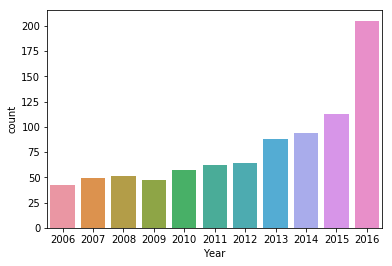

In [159]:
sns.countplot(x='Year', data=train)

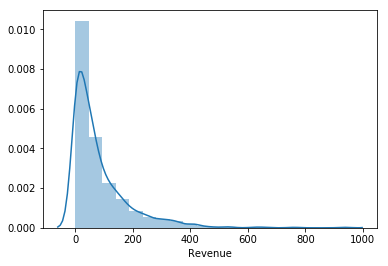

In [160]:
sns.distplot(train.Revenue, bins=20)

## Regresi untuk handling null

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [162]:
train_null = df[df.Metascore.notnull()]

In [163]:
test_null  = df[df.Metascore.isnull()]

In [164]:
x = train_null[['Rating']]
y = train_null['Metascore']
# train_x , val_x, train_y, val_y = train_test_split(x,y, test_size=0.2,random_state=123)

In [165]:
lr = LinearRegression()

In [166]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
#bagi dataset test
x_test = test_null[['Rating']]

In [168]:
predict = lr.predict(x_test)

In [169]:
predict = np.round(predict)

In [170]:
predict

array([60., 77., 35., 63., 12., 46., 73., 83., 67., 75., 49., 54., 24.,
       60., 63., 52., 70., 45., 42., 52., 67., 61., 63., 71., 51., 63.,
       57., 54., 57., 57., 62., 52., 63., 67., 64., 61., 52., 78., 76.,
       42., 56., 52., 56., 63., 47., 66., 41., 59., 37., 64., 61., 34.,
       69., 53., 63., 63., 67., 64., 62., 66., 56., 61., 68., 54.])

In [171]:
test_null.drop(['Metascore'], axis=1, inplace=True)

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
test_null['Metascore'] = predict

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
test_null.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,60.0
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,77.0
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,35.0
39,40,5- 25- 77,"Comedy,Drama","Alienated, hopeful-filmmaker Pat Johnson's epi...",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.1,241,NaN,63.0
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,12.0


In [174]:
df = pd.concat([train_null, test_null])

In [175]:
df.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore        0
dtype: int64

In [176]:
test = df[df.Revenue.isnull()]
train = df[df.Revenue.notnull()]

## Modelling

In [177]:
train.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.000000,-0.308472,-0.236892,-0.235158,-0.296847,-0.271592,-0.191094
Year,-0.308472,1.000000,-0.099359,-0.151539,-0.364052,-0.126790,-0.068079
Runtime,-0.236892,-0.099359,1.000000,0.377635,0.379100,0.267953,0.227019
Rating,-0.235158,-0.151539,0.377635,1.000000,0.515770,0.217654,0.679736
Votes,-0.296847,-0.364052,0.379100,0.515770,1.000000,0.639661,0.335759
Revenue,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.144316
Metascore,-0.191094,-0.068079,0.227019,0.679736,0.335759,0.144316,1.000000


In [178]:
#mulai modelling Linear Regression
lm = LinearRegression()

In [179]:
x_lm = train[['Rating', 'Votes']]
y_lm = train['Revenue']

In [180]:
lm.fit(x_lm, y_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
lm.score(x_lm, y_lm)

0.42633771818370936